Matrix Factorization with Gradient Descent

\begin{eqnarray}
E(W, H) = \frac{1}{2} \sum_i \sum_j M(i,j)(X(i,j) - \sum_k W(i,k)H(k,j))^2
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial W_{i,k}} = -\sum_j M(i,j)(X(i,j) - \sum_{k'} W(i,k')H(k',j)) H(k,j)
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial H_{k,j}} = -\sum_i M(i,j)(X(i,j) - \sum_{k'} W(i,k')H(k',j)) W(i,k)
\end{eqnarray}



$X$ : Observed Matrix

$M$ : Mask Matrix (1 if observed, 0 otherwise)

\begin{eqnarray}
E(W, H) = \frac{1}{2} \trace (X - WH)^\top (X - WH) 
\end{eqnarray}

With missing values
\begin{eqnarray}
E(W, H) = \frac{1}{2} \trace (M\odot (X - WH))^\top (M\odot (X - WH) )
\end{eqnarray}

Partial derivatives
\begin{eqnarray}
\frac{\partial E(W, H)}{\partial W} = -(M\odot(X - WH))H^\top 
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial H} = -W^\top(M\odot(X - WH))
\end{eqnarray}


15.5433574727
0.144460324362
0.066000337106
0.0162170243943
0.00351737107294
0.000882449877086
0.00026651221715
0.000107296384607
6.36062268146e-05
5.12115729416e-05
4.76321051747e-05
4.65886544253e-05
4.6282974486e-05
4.61931910642e-05
4.61667833726e-05
4.61590103597e-05
4.61567214783e-05
4.61560473359e-05
4.61558487578e-05
4.61557902601e-05


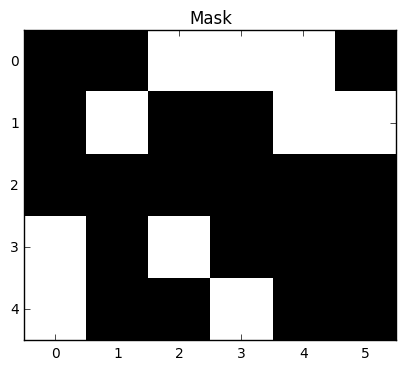

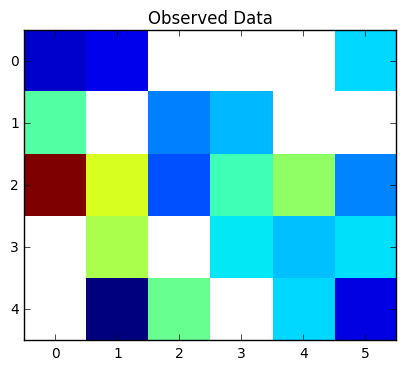

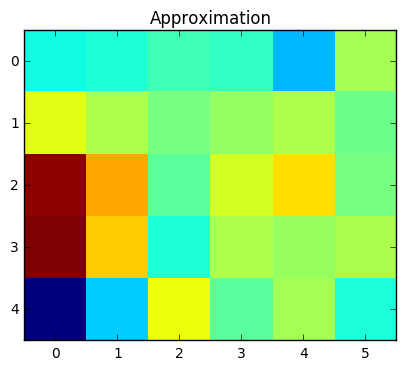

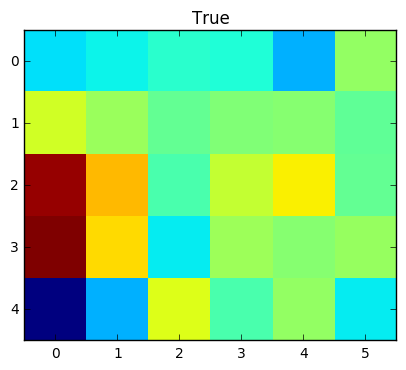

In [38]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

M = 5
N = 6
K = 2 

W_true = np.random.randn(M,K)
H_true = np.random.randn(K,N)

X = W_true.dot(H_true)
X = X+0.05*np.random.randn(M,N)

p_on = 0.6
Mask = (np.random.rand(M,N)<p_on)



W = np.random.randn(M,K)
H = np.random.randn(K,N)

EPOCH = 2000

eta = 0.05

for i in range(EPOCH):
    dW = -(Mask*(X-W.dot(H))).dot(H.T)
    W = W - eta*dW
    dH = -W.T.dot((Mask*(X-W.dot(H))))
    H = H - eta*dH

    if (i%100 == 0):
        print(0.5*np.sum((Mask*(X-W.dot(H)))**2))


plt.imshow(Mask, interpolation='nearest',cmap=plt.cm.gray_r)
plt.title('Mask')
plt.show()

MX = X.copy()
MX[Mask==0] = np.nan

plt.imshow(MX, interpolation='nearest')
plt.title('Observed Data')
plt.show()
plt.imshow(W.dot(H), interpolation='nearest')
plt.title('Approximation')
plt.show()
plt.imshow(X, interpolation='nearest')
plt.title('True')
plt.show()



In [66]:
import scipy.sparse as sp

m = sp.coo.coo_matrix(Mask)

I,J = m.nonzero()

for i,j in zip(I,J):
    print('[%d,%d,%2.3f],' % (i, j, X[i,j]))
    
print('---')
m2 = sp.coo.coo_matrix(1-Mask)

I,J = m2.nonzero()

for i,j in zip(I,J):
    print('[%d,%d, %2.2f],' % (i, j, X[i,j]))

[0,0,-1.064],
[0,1,-0.904],
[0,5,0.532],
[1,0,1.192],
[1,2,0.010],
[1,3,0.340],
[2,0,4.417],
[2,1,2.141],
[2,2,-0.260],
[2,3,1.039],
[2,4,1.633],
[2,5,0.031],
[3,1,1.811],
[3,3,0.619],
[3,4,0.386],
[3,5,0.577],
[4,1,-1.467],
[4,2,1.323],
[4,4,0.516],
[4,5,-0.949],
---
[0,2, -0.57],
[0,3, -0.68],
[0,4, -1.47],
[1,1, 0.62],
[1,4, 0.41],
[1,5, -0.01],
[3,0, 4.61],
[3,2, -0.95],
[4,0, -4.06],
[4,3, -0.25],
